---

## **<font color="Dodgerblue"> Modelación Climática Tropical</font>**
### **<font color="crimson"> Ciclo anual SPEAR</font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install netCDF4 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5py netCDF4 h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import matplotlib.ticker as ticker
import glob

In [8]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=10)

In [9]:
# Archivo de precipitación SPEAR ensamble 1 - Ejemplo
filename='/home/jovyan/ModClim/SPEAR3/monthly_ens001.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 1080, lat: 90, lon: 104)> Size: 40MB
[10108800 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 9kB 1921-01-16T12:00:00 ... 2010-12-16T12:...
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
Attributes:
    long_name:      Total precipitation rate
    units:          kg/m2/s
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order1

In [10]:
# Convertir unidades 
pr=pr*86400
pr['units']='mm day-1'

In [11]:
# Seleccionamos periodo de interés. Completo o Reciente
pr_years = pr.sel(time=slice('1921', '2010'))

In [12]:
jjas = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [13]:
mean_jjas = jjas.mean('time')

### **<font color="Navy"> Serie de tiempo del promedio de área de las precipitaciones sobre el centro-sur de México </font>**


In [14]:
# Asignamos pesos con la función coseno
lats = jjas.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [15]:
# Aplicamos el peso y luego el promedio espacial
pr_weighted = jjas.weighted(weights)
pr_meanglobal = pr_weighted.mean(dim=['lat', 'lon'])

In [16]:
# México ubicación
centrolat=jjas.sel(lat=slice(9.25,33.25))
centrolon=centrolat.sel(lon=slice(242.75,275.75))

centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

pr_annual2=prcentro.resample(time='1Y').mean() # resampleamos los datos, en este caso a escala anual para observar serie de tiempo
#pr_annual2.to_netcdf('SPEAR_serie.nc')

/opt/conda/lib/python3.11/site-packages/xarray/groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


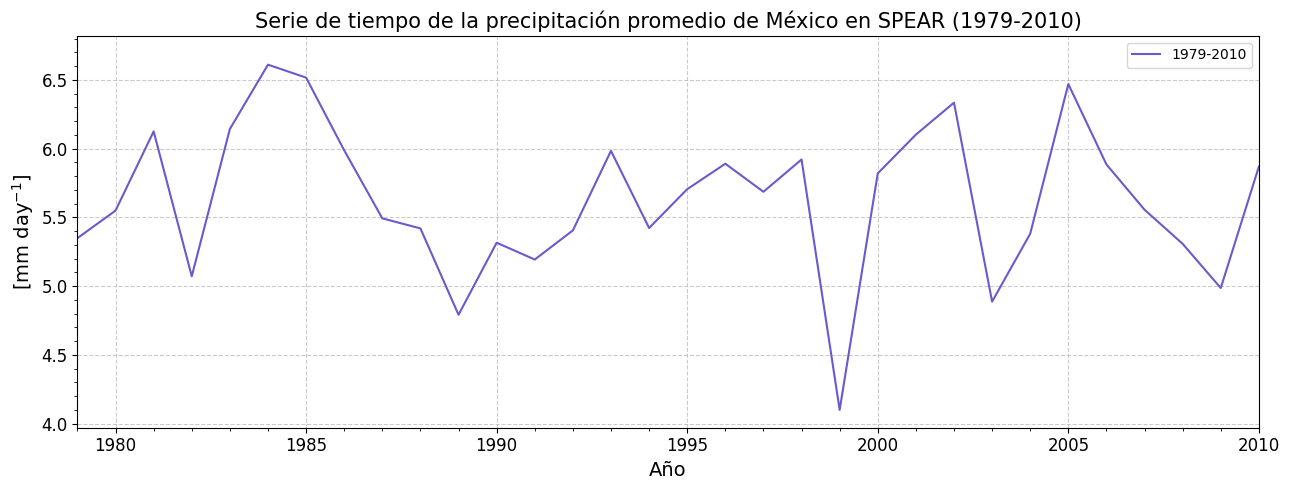

In [17]:
# Prueba de serie de tiempo 
plt.figure(figsize=(13,5))
plt.plot(pr_annual2.time.dt.year,pr_annual2,c='slateblue',label='1979-2010') 
lineplot_setup(1979,2010,'Año','[mm day$^{-1}$]',title='Serie de tiempo de la precipitación promedio de México en SPEAR (1979-2010)')
plt.legend()
plt.tight_layout()

In [18]:
# Genera automaticamente la lista de archivos de todos los miembros sin tener que escribirlos, los ordena
file_list = np.sort(glob.glob("/home/jovyan/ModClim/SPEAR/monthly*ens*.nc"))
print(file_list)

['/home/jovyan/ModClim/SPEAR/monthly_ens001.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens002.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens003.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens004.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens005.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens006.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens007.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens008.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens009.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens010.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens011.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens012.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens013.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens014.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens015.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens016.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens017.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens018.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens019.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens020.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens

In [19]:
# Hacemos una lista para almacenar los datos de cada miembro 
ens_dlist = []

# Ciclo para procesar cada miembro
for i, filename in enumerate(file_list):
    ds = xr.open_dataset(filename)
    pr = ds['precip'] * 86400  # Convertir a mm/dia
    pr['units'] = 'mm day-1'

    # Selección de meses JJAS
    pr_jjas = pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
    pr_climatology = pr_jjas.sel(time=slice('1980', '2010')).mean('time')

    # Se agregan coordenadas
    pr_climatology = pr_climatology.assign_coords(ens=i + 1)  
    ens_dlist.append(pr_climatology)
    
    # Append de los datos a la lista original
ens_combined = xr.concat(ens_dlist, dim='ens')

# Concatena todos los miembros en la dimensión 'ens' 
ens_mean = ens_combined.mean(dim='ens')

In [20]:
# Asignamos pesos con la función coseno
lats = ens_mean.lat
weights = np.cos(np.deg2rad(lats))
weights.name = "weights"

In [21]:
# Recortamos centro-sur de México
centrolat=pr_years.sel(lat=slice(13.75,23.75))
centrolon=centrolat.sel(lon=slice(253.75,273.5))

# Aplicamos el peso y luego el promedio espacial
centro_peso=centrolon.weighted(weights)
prcentro=centrolon.mean(["lon","lat"])

mensual_prcentro = prcentro.groupby(prcentro.time.dt.month).mean()
#mensual_prcentro.to_netcdf('SPEAR21_ciclo.nc')
#mensual_prcentro.to_netcdf('SPEAR80_ciclo.nc')

In [22]:
meses=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic']

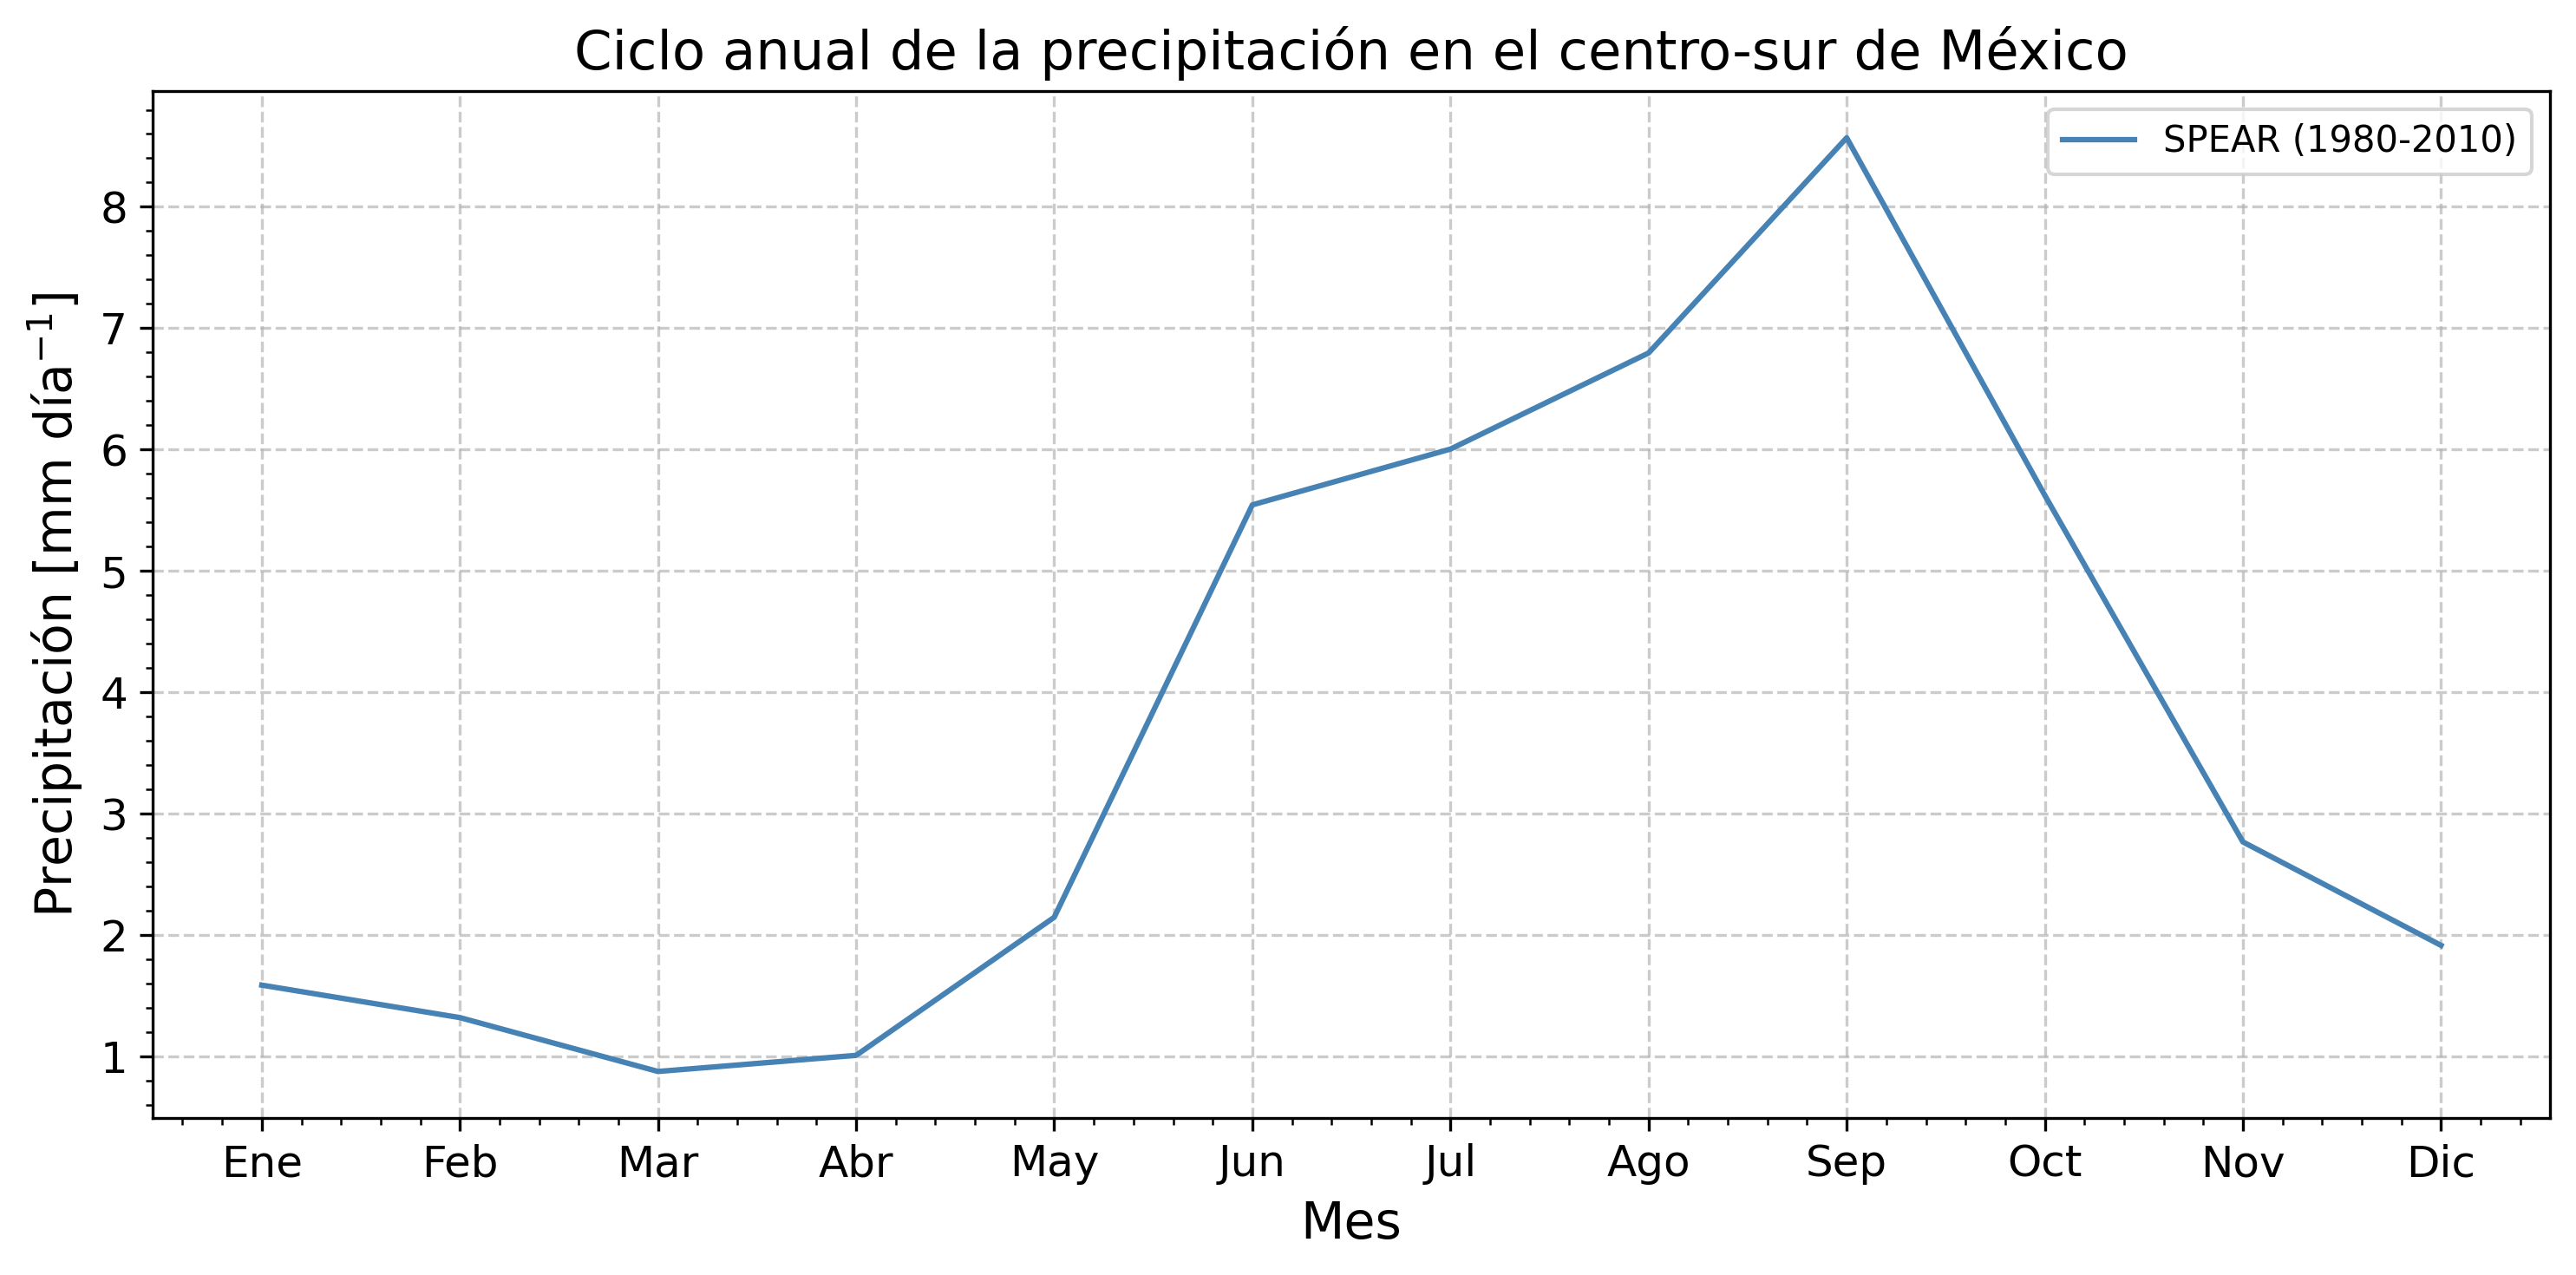

In [23]:
plt.figure(figsize=(10,5), dpi=300)
plt.plot(meses,mensual_prcentro,c='steelblue',label='SPEAR (1980-2010)') 
lineplot_setup(None,None,'Mes','Precipitación [mm día$^{-1}$]',title='Ciclo anual de la precipitación en el centro-sur de México')
plt.legend()
plt.tight_layout()